In [1]:
# importing required packages
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
# reading dataset from csv file and storing in df variable
df = pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# checking the number of records in the dataset
df.shape

(39717, 111)

In [4]:
# Settings the number of rows to display in output to few all column data
# got below code from "https://stackoverflow.com/questions/58298963/jupyter-not-showing-whole-output" url
pd.set_option('display.max_rows', 200)

In [5]:
# checking the datatypes of the columns in the dataset
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

# Datatype Conversions

_Converting the columns data with relevant data type {e.g. converting string date to date format}_

In [6]:
# ID of the customer is not a numeric value to perform some operation, but a unique value to identify the customer
# So, converting id column to String type
df.id = df.id.astype(str)
df.id.describe()

count      39717
unique     39717
top       996679
freq           1
Name: id, dtype: object

In [7]:
# Member ID of the customer is not a numeric value to perform some operation, but a unique value to identify the customer membership
# So, converting member id column to String type

df.member_id = df.member_id.astype(str)
df.member_id.describe()

count      39717
unique     39717
top       996679
freq           1
Name: member_id, dtype: object

In [8]:
# Term in the dataset is available as object, where term is a interger value of number of months the loan period
# replacing the "months" with empty string and converting it to int
df.term = df.term.apply(lambda x: int(x.replace('months', '').strip()))
df.term.describe()

count    39717.000000
mean        42.418007
std         10.622815
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term, dtype: float64

In [9]:
# Interest Rate on the loan is a numeric value and only contains percentage symbol in addition with the interest rate
# by removing "%" from the interest rate column, we can convert it into numberic column [float type]
df.int_rate = df.int_rate.apply(lambda x: float(x.replace('%', '').strip()))
df.int_rate.describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [10]:
# converting issue_d i.e. The month which the loan was funded column type to date format
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df.issue_d.describe()

count                   39717
unique                     55
top       2011-12-01 00:00:00
freq                     2260
first     2007-06-01 00:00:00
last      2011-12-01 00:00:00
Name: issue_d, dtype: object

In [11]:
# converting earliest_cr_line i.e. The month the borrower's earliest reported credit line was opened column type to date format
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y')
df.earliest_cr_line.describe()

count                   39717
unique                    526
top       1998-11-01 00:00:00
freq                      370
first     1969-02-01 00:00:00
last      2068-12-01 00:00:00
Name: earliest_cr_line, dtype: object

In [12]:
#  converting revol_util i.e. Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit  column to float type by removing "%"
df.revol_util = df.revol_util.apply(lambda x: float(str(x).replace('%', '').strip()))
df.revol_util.describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [13]:
# converting last_pymnt_d column to date type column
df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d, format='%b-%y')
df.last_pymnt_d.describe()

count                   39646
unique                    101
top       2016-05-01 00:00:00
freq                     1256
first     2008-01-01 00:00:00
last      2016-05-01 00:00:00
Name: last_pymnt_d, dtype: object

In [14]:
# converting next_pymnt_d column to date type column
df.next_pymnt_d = pd.to_datetime(df.next_pymnt_d, format='%b-%y')
df.next_pymnt_d.describe()

count                    1140
unique                      2
top       2016-06-01 00:00:00
freq                     1125
first     2016-06-01 00:00:00
last      2016-07-01 00:00:00
Name: next_pymnt_d, dtype: object

In [15]:
# converting last_credit_pull_d column to date type column
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d, format='%b-%y')
df.last_credit_pull_d.describe()

count                   39715
unique                    106
top       2016-05-01 00:00:00
freq                    10308
first     2007-05-01 00:00:00
last      2016-05-01 00:00:00
Name: last_credit_pull_d, dtype: object

# Data cleaning
_fixing the issues in the column data_

In [16]:
# As per Data Dictionary, id of a customer should be unique
df.id.is_unique

True

In [17]:
# As per Data Dictionary, member id of a customer should be unique
# checking member id column is unique by checking number of records [count] and unique values [unique] are same/equal
df.member_id.is_unique

True

In [18]:
# checking that funded amount should be less than or equals to applied loan amount, by using the opposite condition output rows are zero
df[df.funded_amnt > df.loan_amnt].shape

(0, 111)

In [19]:
# checking that funded amount should be greater than or equals to funded amount by investor, and this is being tested by using the opposite condition where output rows should be zero
df[df.funded_amnt<df.funded_amnt_inv].shape

(0, 111)

In [20]:
# Term of the loan should be either 36 months or 60 months
# So, checking the unique values in the term column by grouping the same

df.term.groupby(by=df.term).describe()

,count,mean,std,min,25%,50%,75%,max
term,,,,,,,,
36,29096.0,36.0,0.0,36.0,36.0,36.0,36.0,36.0
60,10621.0,60.0,0.0,60.0,60.0,60.0,60.0,60.0


In [21]:
df.int_rate.groupby(by=[df.grade, df.sub_grade, df.term]).describe()

count       mean       std    min      25%     50%  \
grade sub_grade term                                                        
A     A1        36    1139.0   5.805224  0.469727   5.42   5.4200   5.420   
      A2        36    1494.0   6.381653  0.574339   5.79   5.7900   6.305   
                60      14.0   6.067143  0.454743   5.79   5.7900   5.790   
      A3        36    1769.0   7.182120  0.515136   6.17   6.9900   7.140   
                60      41.0   6.406585  0.421726   6.17   6.1700   6.170   
      A4        36    2753.0   7.681133  0.649123   6.00   7.4900   7.510   
                60     133.0   7.239850  0.522826   6.54   6.5400   7.490   
      A5        36    2495.0   8.302365  0.737729   6.91   7.8800   8.490   
                60     247.0   7.909069  0.664500   6.91   7.6600   7.880   
B     B1        36    1619.0  10.027906  0.597094   6.00   9.8800   9.910   
                60     211.0   9.818673  0.512384   8.88   9.6300   9.910   
      B2        36    1724.0  10.495626  0.583990   6.00  10.2500  10.590   
                60     333.0  10.456456  0.418822   9.25  10.5900  10.650   
      B3        36    2195.0  11.024050  0.636782   6.00  10.6200  10.990   
                60     722.0  10.898518  0.647035   9.62  10.3700  10.990   
      B4        36    1819.0  11.441715  0.742029   9.64  10.9900  11.490   
                60     693.0  11.325296  0.754956   9.99  10.7400  11.490   
      B5        36    1974.0  11.783642  0.739154   6.00  11.3600  11.990   
                60     730.0  11.785466  0.703462  10.36  11.1100  11.860   
C     C1        36    1470.0  12.770735  0.649075  10.28  12.6800  12.870   
                60     666.0  13.031321  0.365396  12.23  12.6800  12.990   
      C2        36    1341.0  13.262990  0.703406  10.59  13.0600  13.220   
                60     670.0  13.531806  0.577995   6.00  13.1100  13.490   
      C3        36    1092.0  13.550769  0.751846  10.91  13.1600  13.570   
                60     437.0  13.928238  0.476240  12.98  13.4300  13.980   
      C4        36     954.0  13.929612  0.918261   6.00  13.4700  13.850   
                60     282.0  14.459255  0.715074  13.35  13.8000  14.790   
      C5        36     892.0  14.357635  1.018350   6.00  13.7900  14.260   
                60     294.0  14.934014  0.838575  13.72  14.1700  15.230   
D     D1        36     918.0  14.843007  1.020472   6.00  14.5400  14.610   
                60      13.0  15.570769  0.800765  14.54  14.5900  15.620   
      D2        36     816.0  15.185723  0.996643  12.17  14.9100  14.960   
                60     532.0  15.600508  0.883387   6.00  14.9100  15.210   
      D3        36     637.0  15.492480  1.009369  12.49  15.2800  15.330   
                60     536.0  16.111213  0.859198  14.83  15.2800  16.490   
      D4        36     494.0  15.825688  1.073832  12.80  15.2000  15.700   
                60     487.0  16.507084  0.839664  15.20  15.6500  16.890   
      D5        36     366.0  16.223306  1.065282  13.12  16.0000  16.020   
                60     508.0  16.943504  1.086384   6.00  16.0200  17.490   
E     E1        36     286.0  16.511503  1.093350  13.43  15.9500  16.400   
                60     477.0  17.320629  1.027651  15.95  16.4000  16.450   
      E2        36     211.0  16.808673  1.246084  13.75  16.0000  16.770   
                60     445.0  17.745978  1.026407  16.32  16.7700  18.390   
      E3        36     164.0  17.247073  1.192693  14.07  16.3200  17.140   
                60     389.0  17.999820  1.369287   6.00  17.1400  17.190   
      E4        36     108.0  17.347500  1.800540   6.00  16.6300  17.510   
                60     346.0  18.558931  1.105878  17.06  17.5225  19.290   
      E5        36      99.0  17.722727  1.146122  14.67  17.1900  17.880   
                60     317.0  19.018770  1.328380   6.00  17.8800  19.690   
F     F1        36      62.0  18.159839  1.384666  15.01  17.2600  18.170   
                60 

In [22]:
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [23]:
# Home ownership should be Mortage, Own, Rent and Other
df.home_ownership.value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [24]:
# In home ownership column we have None for home ownership, which shouldn't be there
# As there is no specific factor to determine the home ownership
pd.set_option('display.max_columns', 200)
df[df.home_ownership=='NONE']

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39318,231321,214993,10000,10000,1228.06,36,7.75,312.22,A,A3,ups,5 years,NONE,22200.0,Not Verified,2008-01-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,"I plan to pay off my credit cards, leaving me ...",debt_consolidation,Melinda Holster,233xx,VA,5.24,0,1994-04-01,0,0.0,0.0,9,0,4767,8.7,22,f,0.0,0.0,11239.620890,1380.00,9999.99,1239.63,0.0,0.0,0.0,2011-02-01,313.59,NaT,2011-01-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
39659,121568,121574,4000,4000,1925.00,36,9.64,128.41,B,B4,NaN,< 1 year,NONE,100000.0,Not Verified,2007-08-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,I took a high interest loan from Citibank in 2...,other,Refinancing high interest loan,950xx,CA,15.00,0,1999-05-01,1,NaN,NaN,6,0,8155,14.9,8,f,0.0,0.0,4622.489229,2224.58,4000.00,622.49,0.0,0.0,0.0,2010-09-01,129.76,NaT,2007-08-01,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39660,121535,121373,2800,2800,1625.00,36,8.70,88.65,B,B1,NaN,< 1 year,NONE,120000.0,Not Verified,2007-08-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The family is expanding in October and we are ...,other,Baby is coming,024xx,MA,15.00,0,1999-05-01,1,NaN,NaN,6,0,8155,14.9,8,f,0.0,0.0,3191.218575,1852.05,2800.00,391.22,0.0,0.0,0.0,2010-09-01,89.80,NaT,2007-08-01,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# RENT and MORTGAGE are near equals, so filling missing value with these are difficult
# So, choosing OTHER as home ownership is wise in this situation
df.home_ownership = df.home_ownership.apply(lambda x: "OTHER" if x == "NONE" else x)

# again checking the home ownership column 
df.home_ownership.value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER         101
Name: home_ownership, dtype: int64

In [26]:
df.verification_status.value_counts(dropna=False)

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [27]:
df.loan_status.value_counts(dropna=False)

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

# Data Cleaning & Handling missing values

### Removing empty columns

In [28]:
# checking number of empty cells in a column
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [29]:
# There are total of 39717 records in the dataset
# if we abserved above data which consist of number of null values in a column
# we can see that some of the columns are completely empty, which are not usable for analysis, so dropping the column
df = df.dropna(axis=1, how='all')
df.shape

(39717, 57)

In [30]:
# dropping columns with huge missing records
df = df.drop(axis=1, columns=['next_pymnt_d', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'])
df.shape

(39717, 54)

### Checking single value column in the dataset which are not usable in Analysis

In [31]:
df.pymnt_plan.value_counts(dropna=False)

n    39717
Name: pymnt_plan, dtype: int64

In [32]:
df.initial_list_status.value_counts(dropna=False)

f    39717
Name: initial_list_status, dtype: int64

In [33]:
df.collections_12_mths_ex_med.value_counts(dropna=False)


0.0    39661
NaN       56
Name: collections_12_mths_ex_med, dtype: int64

In [34]:
df.policy_code.value_counts(dropna=False)

1    39717
Name: policy_code, dtype: int64

In [35]:
df.acc_now_delinq.value_counts(dropna=False)

0    39717
Name: acc_now_delinq, dtype: int64

In [36]:
df.chargeoff_within_12_mths.value_counts(dropna=False)

0.0    39661
NaN       56
Name: chargeoff_within_12_mths, dtype: int64

In [37]:
df.delinq_amnt.value_counts(dropna=False)

0    39717
Name: delinq_amnt, dtype: int64

In [38]:
df.tax_liens.value_counts(dropna=False)

0.0    39678
NaN       39
Name: tax_liens, dtype: int64

In [39]:
df.application_type.value_counts(dropna=False)

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [40]:
df = df.drop(axis=1, columns=['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 
                              'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'application_type'])
df.shape

(39717, 45)

In [41]:
df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util

In [42]:
df.emp_title.describe()

count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object

In [43]:
# Filling missing emp_title as Others
df.emp_title = df.emp_title.fillna("Others")
df.emp_title.isnull().sum()

0

In [44]:
df.emp_length.value_counts(dropna=False)

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
NaN          1075
Name: emp_length, dtype: int64

In [45]:
df.emp_length.mode()[0]

'10+ years'

In [46]:
df.emp_length = df.emp_length.fillna(df.emp_length.mode()[0])
df.emp_length.value_counts(dropna=False)

10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [47]:
# in desc column there 12940, this is near 1/3rd of records
# so, imputing new value to the column as Others
df.desc = df.desc.fillna("Others")
df.desc.isnull().sum()

0

In [48]:
df.title.value_counts()

Debt Consolidation         2184
Debt Consolidation Loan    1729
Personal Loan               659
Consolidation               517
debt consolidation          505
                           ... 
SaraW                         1
re-model bathroom             1
JM                            1
Scooter loan                  1
bluegreen payoff              1
Name: title, Length: 19615, dtype: int64

* By abserving above title column value, there seems to be same value but different case and spelling differ

* So, we can replace other values with Dept Consolidation in title column

In [49]:
# updating the existing value using lambda function
df.title = df.title.apply(lambda x: 'Debt Consolidation' if str(x).lower().find('Consolid')!= -1 else x)
# checking the title column again
df.title.describe()

count                  39706
unique                 19615
top       Debt Consolidation
freq                    2184
Name: title, dtype: object

In [50]:
df.title.mode()[0]

'Debt Consolidation'

As we can see, Debt Consolidation there are 10150 records out of 30k+ records <br>
So, imputing the missing 11 values with **Debt Consolidation**

In [51]:
# filling null value with Debt Consolidation
df.title = df.title.fillna(df.title.mode()[0])
# Checking null values in the title columnm
df.title.isnull().sum()

0

In [52]:
# Number of public record bankruptcies field is an affective field for analysis
df.pub_rec_bankruptcies.value_counts(dropna=False)

0.0    37339
1.0     1674
NaN      697
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [53]:
# imputing the null values in pub_rec_bankruptcies column with 0.0 as it has 95% records
df.pub_rec_bankruptcies = df.pub_rec_bankruptcies.fillna(0.0)
df.pub_rec_bankruptcies.value_counts(dropna=False)

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

> There are 50 missing values in revol_util column <br>
> as revol_util is a numeric type, so considering the median value to fill the missing records


In [54]:
# checking the median of the revol_util column
round(df.revol_util.median())

49

In [55]:
# imputing the median in missing value
df.revol_util = df.revol_util.fillna(df.revol_util.median())
# checking the missing value count in revol_util columm
df.revol_util.isnull().sum()

0

In [56]:
import calendar
df[~df.last_pymnt_d.isnull()].last_pymnt_d.apply(lambda x: calendar.month_name[int(x.month)]).value_counts()

May          4285
March        3761
December     3512
October      3271
August       3242
July         3226
February     3211
April        3204
January      3041
September    3015
November     2945
June         2933
Name: last_pymnt_d, dtype: int64

> as we can see, all the values are near similar

In [57]:
df[df.last_pymnt_d.isnull()].loan_status.value_counts()

Charged Off    71
Name: loan_status, dtype: int64

> As we can see all the customers with missing last_pymt_d are defaulters <br>
> So, imputing missing value here might be an effect as well as dropping also might loss of data <br>
> converting type from date to string and introducing LastPay_NA to replace missing value

In [58]:
df.last_pymnt_d = df.last_pymnt_d.apply(lambda x: calendar.month_name[int(x.month)] if pd.notna(x) else 'LastPay_NA' )

In [59]:
df.last_credit_pull_d.describe()

count                   39715
unique                    106
top       2016-05-01 00:00:00
freq                    10308
first     2007-05-01 00:00:00
last      2016-05-01 00:00:00
Name: last_credit_pull_d, dtype: object

> As we can see that 2016-05-01 is repeated 10308 times in last_credit_pull_d column, which is 1/3 of total records <br>
> there are only 2 records missing in the same column <br> 
> so, imputing the value at missing values

In [60]:
df.last_credit_pull_d = df.last_credit_pull_d.fillna('2016-05-01 00:00:00')
df.last_credit_pull_d.isnull().sum()

0

In [61]:
# checking the missing values again
df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
url                        0
desc                       0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt   

In [62]:
# checking number of records
df.shape

(39717, 45)

In [63]:
df.dtypes

id                                 object
member_id                          object
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                                int64
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                         object
dti                               

# Checking the outliers

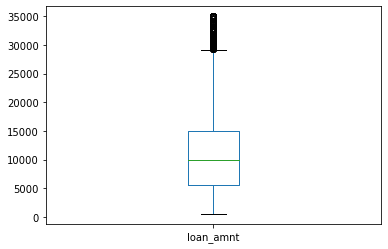

In [64]:
df.loan_amnt.plot.box()
plt.show()

In [65]:
q3 = df.loan_amnt.quantile(.75)
q1 = df.loan_amnt.quantile(.25)
iqr = q3-q1
low = q1-1.5*iqr
high = q3+1.5*iqr

print(f"lower inner fence {low}")
print(f'upper inner fence {high}')

lower inner fence -8750.0
upper inner fence 29250.0


> as we can see the lower inner fence is a negative value <br>
> So, we can ignore the lower fence outliers <br>
> lets check the upper fence outliers

In [66]:
# checking number of records in outside the upper fence
df[df.loan_amnt>high].shape

(1230, 45)

In [67]:
df[df.loan_amnt>high].loan_status.value_counts()

Fully Paid     843
Charged Off    253
Current        134
Name: loan_status, dtype: int64

> As we can see there are 1230 records as outliers <br>
> so, dropping these values for better analysis

In [68]:
df = df[df.loan_amnt<=high]
df.shape

(38487, 45)

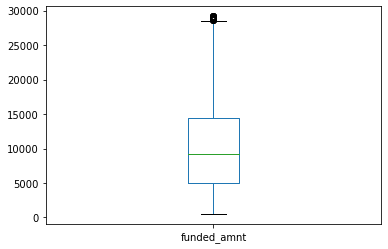

In [69]:
df.funded_amnt.plot.box()
plt.show()

> there are outliers in funded_amnt column <br>
> lets look into the lower and upper fence

In [70]:
q3 = df.funded_amnt.quantile(.75)
q1 = df.funded_amnt.quantile(.25)
iqr = q3-q1
low = q1-1.5*iqr
high = q3+1.5*iqr

print(f"lower inner fence {low}")
print(f'upper inner fence {high}')

lower inner fence -9100.0
upper inner fence 28500.0


In [71]:
df = df[df.funded_amnt<=high]
df.shape

(38453, 45)

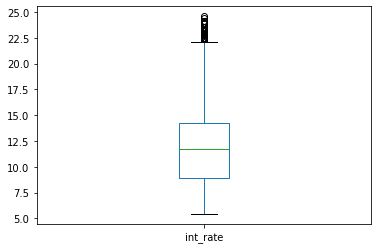

In [72]:
df.int_rate.plot.box()
plt.show()

In [73]:
df.int_rate.describe()

count    38453.000000
mean        11.896110
std          3.645991
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.590000
Name: int_rate, dtype: float64

In [74]:
df.int_rate.quantile(.95)

18.25

> as we see now, 95th percentile is 18.25 and maximum value is 24.59
> clearly there is a outlier

In [75]:
q3 = df.int_rate.quantile(.75)
q1 = df.int_rate.quantile(.25)
iqr = q3-q1
low = q1-1.5*iqr
high = q3+1.5*iqr

print(f"lower inner fence {low}")
print(f'upper inner fence {high}')

lower inner fence 0.9449999999999994
upper inner fence 22.265


In [76]:
df = df[df.int_rate<=high]
df.shape

(38379, 45)

In [77]:
df.installment.describe()

count    38379.000000
mean       307.114447
std        186.194683
min         15.690000
25%        164.020000
50%        272.650000
75%        406.660000
max       1021.000000
Name: installment, dtype: float64

In [78]:
q3 = df.installment.quantile(.75)
q1 = df.installment.quantile(.25)
iqr = q3-q1
low = q1-1.5*iqr
high = q3+1.5*iqr

print(f"lower inner fence {low}")
print(f'upper inner fence {high}')

lower inner fence -199.94000000000003
upper inner fence 770.6200000000001


In [79]:
df = df[df.installment<=high]
df.shape

(37289, 45)

> We have completed all the outliers in the dataset

# Analysis

## Univariate Analysis

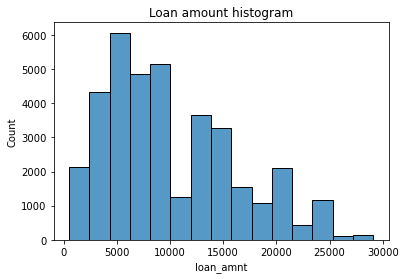

In [95]:
sns.histplot(data=df.loan_amnt, bins=15)
plt.title('Loan amount histogram')
plt.show()

As we can see the above histogram, that most of the loans are for 5000 & less proposals are for loan amount greater than 25000

We can also observe that there is a constant increase towards 5000 and from there there is a irregular decreament 

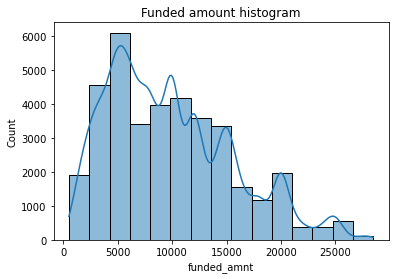

In [96]:
sns.histplot(data=df.funded_amnt, bins=15, kde=True)
plt.title('Funded amount histogram')
plt.show()

we can observe that there is a constant increase of loans till 5000 and from there there is a decrease of number of loans (there are hikes, but still it's continue to decrease the number of loans)

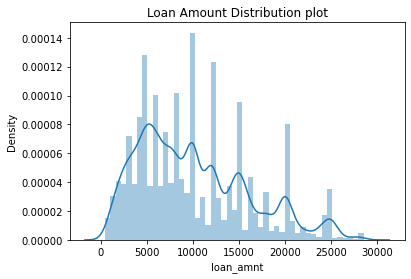

In [102]:
sns.distplot(df.loan_amnt)
plt.title('Loan Amount Distribution plot')
plt.show()

Now we can in the dist plot, we can see similar behavior as previous

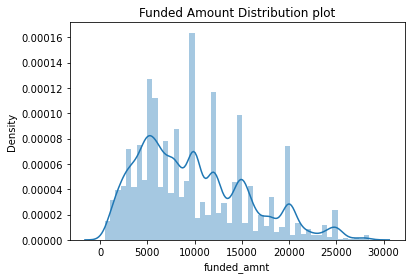

In [103]:
sns.distplot(df.funded_amnt)
plt.title('Funded Amount Distribution plot')
plt.show()

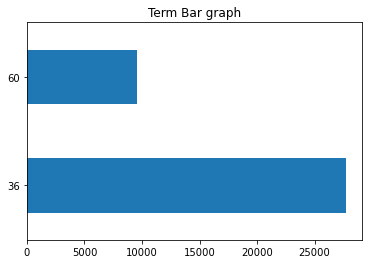

In [114]:
df.term.value_counts().plot.barh(x='freq of loans', y='term')
plt.title('Term Bar graph')
plt.show()

as we can see that most of the loans are with term 36, which as more than twice as 60 term loans

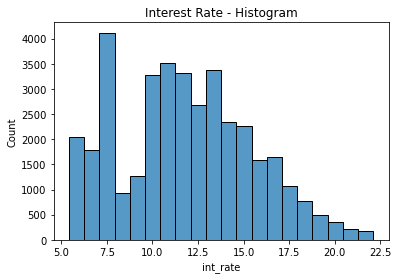

In [119]:
sns.histplot(data=df.int_rate, bins=20)
plt.title('Interest Rate - Histogram')
plt.show()

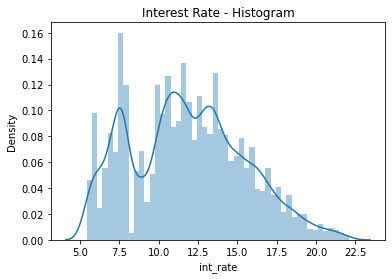

In [120]:
sns.distplot(df.int_rate)
plt.title('Interest Rate - Distribution Plot')
plt.show()

In [127]:
df.to_csv('output.csv')

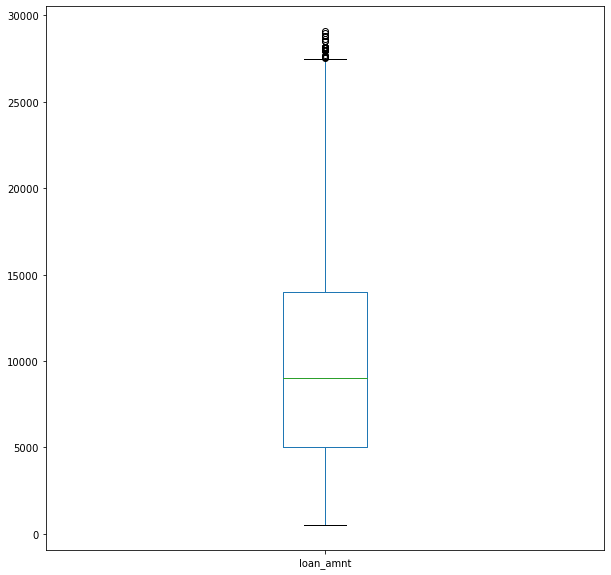

In [132]:
plt.figure(figsize=[10,10])
df.loan_amnt.plot.box()
plt.show()

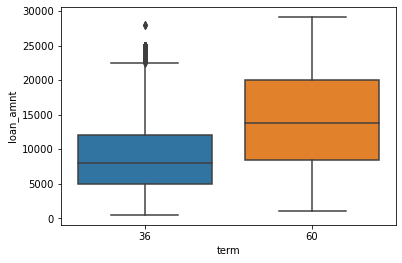

In [143]:
sns.boxplot(x=df.term, y=df.loan_amnt)
plt.title('Term vs Loan Amount')
plt.show()

#### Observation
* By observing above chart, we can see that for 60 months term the mean, 25th quantile and 75th quantiel are higher compare to 36 month term loan
* 60 month 25th quantile to approximate to mean/50th quantile of 36 term loan
* 60 month loan mean is higher than 75th quantitle of 36 term loan
* 60 month loan upper fence is approximate to maximum loan amount for 36 term 

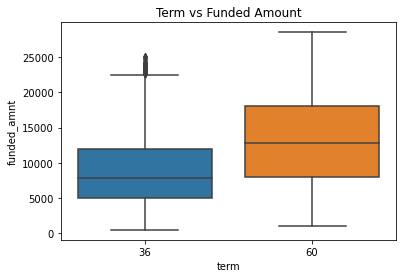

In [144]:
sns.boxplot(x=df.term, y=df.funded_amnt)
plt.title('Term vs Funded Amount')
plt.show()

#### observation
* above plot is almost similar to term vs loan amount plot, except for the values for the upper fence

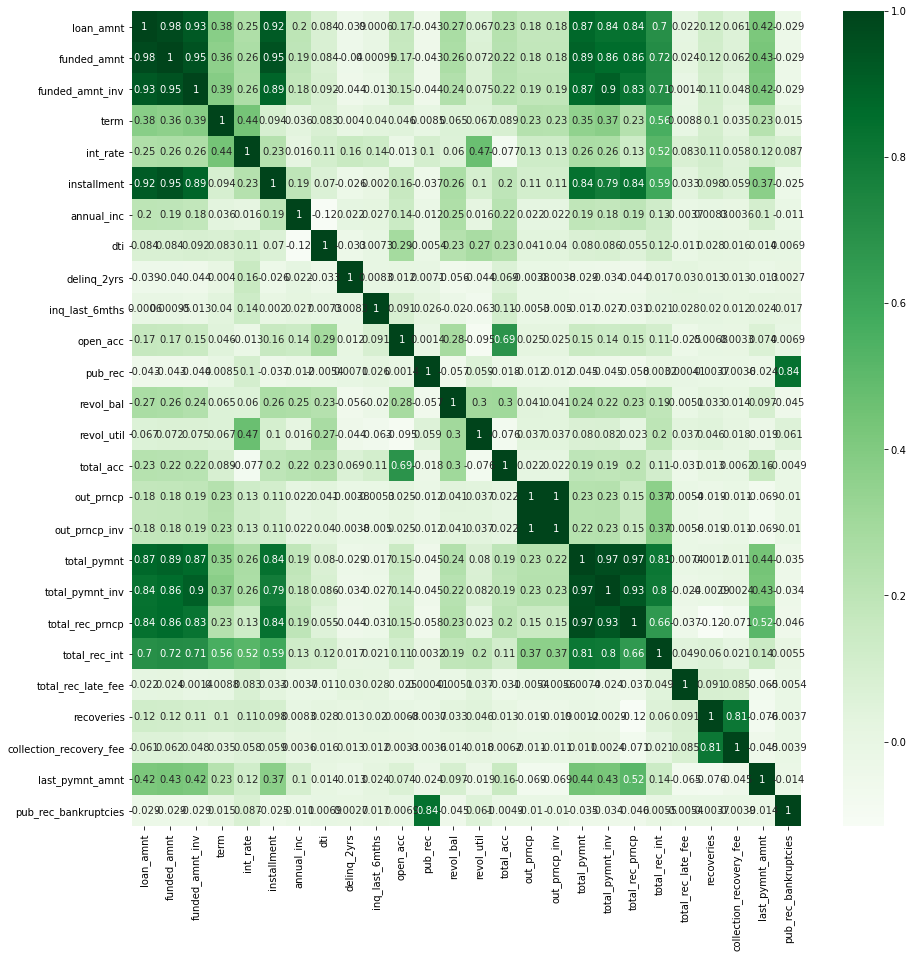

In [81]:
plt.figure(figsize=[15,15])
sns.heatmap(df.corr(), cmap="Greens", annot=True)
plt.show()

## Bivariate Analysis

df.funded_amnt_inv.plot.box()
plt.show()

df[df.funded_amnt_inv>30000].loan_status.value_counts()

df[df.funded_amnt_inv<=30000].loan_status.value_counts()

df[df.funded_amnt>30000].loan_status.value_counts()

df.int_rate.plot.box()
plt.show()

df[df.int_rate>22.5].loan_status.value_counts()

df[df.int_rate<22.5].loan_status.value_counts()

df.pivot_table(columns=['sub_grade'], index='loan_status', aggfunc=np.sum)